## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

In [65]:
from sklearn.datasets import load_boston

In [66]:
data = load_boston()

In [67]:
X, y = data['data'], data['target']
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [68]:
%matplotlib inline

In [69]:
import matplotlib.pyplot as plt

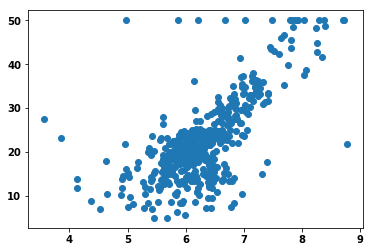

In [70]:
def draw_rm_and_price():
    plt.scatter(X[:,5], y)
draw_rm_and_price()

In [71]:
import random

In [72]:
def price(rm, k, b):
    return k * rm + b

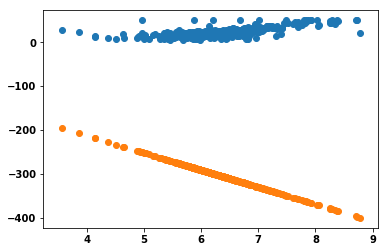

In [73]:
X_rm = X[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [74]:
def loss(y,y_hat): # to evaluate the performance
    return sum(((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y),list(y_hat)))) / len(y)

In [77]:
trying_time = 2000

min_loss = float('inf')

direction = [
    (+1,+1),
    (+1,-1),
    (-1,+1),
    (-1,-1)
]

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

scalar = 0.1

update_time = 0

next_direction = random.choice(direction)

for i in range(trying_time):
    k_direction,b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r,current_k,current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        update_time += 1
        
        if update_time % 10 == 0:
            print('When time is : {},get best_k : {} best_b: {}, and the loss is {}'.format(i,best_k,best_b,min_loss))
    else:
        next_direction = random.choice(direction)
    


When time is : 9,get best_k : 53.135509874430554 best_b: -40.9333268333299, and the loss is 74153.5336318384
When time is : 19,get best_k : 52.13550987443054 best_b: -41.933326833329915, and the loss is 70223.13569910025
When time is : 29,get best_k : 51.135509874430525 best_b: -42.93332683332993, and the loss is 66399.8549531093
When time is : 39,get best_k : 50.13550987443051 best_b: -43.93332683332994, and the loss is 62683.691393865316
When time is : 49,get best_k : 49.1355098744305 best_b: -44.93332683332996, and the loss is 59074.64502136837
When time is : 59,get best_k : 48.13550987443048 best_b: -45.93332683332997, and the loss is 55572.71583561848
When time is : 69,get best_k : 47.13550987443047 best_b: -46.933326833329986, and the loss is 52177.903836615544
When time is : 79,get best_k : 46.135509874430454 best_b: -47.93332683333, and the loss is 48890.2090243598
When time is : 89,get best_k : 45.13550987443044 best_b: -48.933326833330014, and the loss is 45709.63139885095
Wh

In [78]:
def partial_k(x, y, y_hat):
    n = len(y)
    
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
        
    return -2 / n * gradient

def partial_b(y, y_hat):
    n = len(y)
    
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [79]:
from icecream import ic

In [80]:
trying_times = 2000

X, y = data['data'], data['target']

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04

update_time = 0

for i in range(trying_times):
    price_by_k_and_b = [price(r,current_k,current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    
    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    b_gradient = partial_b(y, price_by_k_and_b)
    
    current_k = current_k - k_gradient * learning_rate
    current_b = current_b - b_gradient * learning_rate

When time is : 0, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43429.73058686752
When time is : 50, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 19097.7537536141
When time is : 100, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 8412.456869993708
When time is : 150, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 3720.0484181010343
When time is : 200, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 1659.3944946550155
When time is : 250, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 754.4657239722088
When time is : 300, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 357.06932927753576
When time is : 350, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 182.55387829930956
When time is : 400, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the l

In [81]:
trying_times = 20000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-02


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 3534.128426572056
When time is : 50, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 44.57625390254946
When time is : 100, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 44.55306807945024
When time is : 150, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 44.53043322613516
When time is : 200, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 44.50833624978894
When time is : 250, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 44.48676436872338
When time is : 300, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 44.46570510498463
When time is : 350, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 44.44514627713494
When time is : 400, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss

When time is : 3800, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.761229148042005
When time is : 3850, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.75741093640097
When time is : 3900, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.753683457758086
When time is : 3950, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.75004455600522
When time is : 4000, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.746492126270425
When time is : 4050, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.743024113700216
When time is : 4100, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.73963851227102
When time is : 4150, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.73633336362891
When time is : 4200, get best_k: 15.935509874430027 best_b: -78.133326833329

When time is : 7700, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.62517005143793
When time is : 7750, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.624585041860776
When time is : 7800, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.624013933994085
When time is : 7850, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.623456397488546
When time is : 7900, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.62291210984488
When time is : 7950, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.62238075622757
When time is : 8000, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.62186202928246
When time is : 8050, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.62135562895909
When time is : 8100, get best_k: 15.935509874430027 best_b: -78.1333268333294

When time is : 11400, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60470456169114
When time is : 11450, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60460587802184
When time is : 11500, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.604509539394265
When time is : 11550, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.604415490082495
When time is : 11600, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.604323675685166
When time is : 11650, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.604234043093385
When time is : 11700, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.604146540460434
When time is : 11750, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.604061117171675
When time is : 11800, get best_k: 15.935509874430027 best_b: -78.1

When time is : 15100, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60125229407073
When time is : 15150, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.601235647391874
When time is : 15200, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60121939629166
When time is : 15250, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60120353136985
When time is : 15300, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60118804344977
When time is : 15350, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60117292357241
When time is : 15400, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60115816299199
When time is : 15450, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60114375317056
When time is : 15500, get best_k: 15.935509874430027 best_b: -78.133326

When time is : 18650, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60067878153086
When time is : 18700, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60067576335587
When time is : 18750, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60067281690251
When time is : 18800, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60066994046622
When time is : 18850, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60066713238338
When time is : 18900, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60066439102963
When time is : 18950, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.60066171481928
When time is : 19000, get best_k: 15.935509874430027 best_b: -78.13332683332942, and the loss is: 43.600659102204276
When time is : 19050, get best_k: 15.935509874430027 best_b: -78.133326

# Dynamic Programming

In [82]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [83]:
from collections import defaultdict
price = defaultdict(int)

In [84]:
for i, p in enumerate(original_price):
    price[i + 1] = p

In [85]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

In [86]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    print('function: {} called once! '.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [87]:
def some_funcion_1(): print('I am function 1')

In [88]:
get_call_times(some_funcion_1)

I am function 1
function: some_funcion_1 called once! 


In [89]:
called_time

defaultdict(int, {'some_funcion_1': 1})

In [90]:
call_time_with_arg = defaultdict(int)

In [91]:
from functools import wraps

In [92]:
def memo(f):
    call_time_with_arg = defaultdict(int)
    @wraps(f)
    def wrap(n):
        result = None
        if n in call_time_with_arg:
            result = call_time_with_arg[n]
        else:
            result = f(n)
            call_time_with_arg[n] = result
        return result
    
    return wrap
        

In [93]:
@memo
def r(n):
    max_price,max_split = max([(price[n],0)]+[(r(i) + r(n-i),i) for i in range(1,n)], key = lambda x: x[0])

In [94]:
solution = {}
@memo
def r(n):

    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )

    solution[n] = (n - max_split, max_split)
    
    return max_price

In [95]:
def parse_solution(n):
    left_split, right_split = solution[n]
    if right_split == 0:
        return [left_split]
    else:
        parse_solution(left_split)+parse_solution(right_split)
        

In [96]:
from collections import Counter

In [97]:
called_time_with_arg = defaultdict(int)

def get_call_time(f):
    """@param f is a function"""
    @wraps(f)
    def wrap(n):
        """Haha I am warp"""
       # print('I can count')
        result = f(n)
        called_time_with_arg[(f.__name__, n)] += 1
        return result
    return wrap

In [98]:
def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return _wrap

In [99]:
@get_call_time
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )

    solution[n] = (n - max_split, max_split)
    
    return max_price

In [102]:
r(14)

43

In [103]:
Counter(called_time_with_arg).most_common()

[(('r', 1), 26),
 (('r', 2), 24),
 (('r', 3), 22),
 (('r', 4), 20),
 (('r', 5), 18),
 (('r', 6), 16),
 (('r', 7), 14),
 (('r', 8), 12),
 (('r', 9), 10),
 (('r', 10), 8),
 (('r', 11), 6),
 (('r', 12), 4),
 (('r', 13), 2),
 (('r', 14), 2)]

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [54]:
import numpy as np

In [55]:
def loss(y,y_hat):
    return sum([np.abs(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))]) / len(y)

# $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$
# $ gradient_k = \frac{1}{n}\sum{x}$    , $ k >= \frac{y-b}{x}$
# $ gradient_k = \frac{1}{n}\sum{-x}$    ,$ k < \frac{y-b}{x}$
# $ gradient_b = \frac{1}{n}\sum{1}$    ,$ b > y-kx $
# $ gradient_b = \frac{1}{n}\sum{-1}$    , $ b < y-kx$

# 导数

In [56]:
def partial_k(k, x, y, b):
    n=len(y)
    gradient = 0
    for i,x_i in enumerate(x):
        border = ((y[i] - b) / x_i)
        if k >= border:
            gradient +=  x_i
        else:
            gradient += -1 * x_i
    return gradient / n
    
def partial_b(b, x, y, k):
    n = len(y)
    gradient = 0
    for i,x_i in enumerate(x):
        border = y[i] - k * x_i
        if b >= border:
            gradient += 1
        else:
            gradient += -1
    return gradient / n
    

In [57]:
from sklearn.datasets import load_boston

In [58]:
data = load_boston()
X,y =data['data'], data['target']
X_rm = X[:, 5]

In [59]:
import random

In [60]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

In [64]:
trying_time = 2000

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 0.001
update_time = 0

# while True:
for _ in range(trying_time):
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = loss(y,price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
   
        best_k, best_b = current_k, current_b 
        
        update_time += 1
        if update_time % 50 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(update_time, current_k, current_b, current_loss))
    
    k_gradient = partial_k(current_k, X_rm, y,current_b)
    b_gradient = partial_b(current_b, X_rm, y,current_k)
    
    current_k = current_k - k_gradient * learning_rate
    current_b = current_b - b_gradient * learning_rate
        

When time is : 50, get best_k: 14.549340586210054 best_b: 86.35243750746142, and the loss is: 155.2569173447393
When time is : 100, get best_k: 14.235108866842435 best_b: 86.30243750746118, and the loss is: 153.23208587560467
When time is : 150, get best_k: 13.920877147474815 best_b: 86.25243750746094, and the loss is: 151.20725440647004
When time is : 200, get best_k: 13.606645428107196 best_b: 86.2024375074607, and the loss is: 149.1824229373354
When time is : 250, get best_k: 13.292413708739577 best_b: 86.15243750746046, and the loss is: 147.15759146820068
When time is : 300, get best_k: 12.978181989371958 best_b: 86.10243750746022, and the loss is: 145.13275999906594
When time is : 350, get best_k: 12.663950270004339 best_b: 86.05243750745998, and the loss is: 143.1079285299314
When time is : 400, get best_k: 12.34971855063672 best_b: 86.00243750745975, and the loss is: 141.08309706079666
When time is : 450, get best_k: 12.0354868312691 best_b: 85.9524375074595, and the loss is: 13

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [ ]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    #都不为空，则返回最后一位
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    #'ABCDE', 'ABCCEF'
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]

    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [ ]:
#

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:有利于根据导数反方向，快速搜索到损失函数的极值。

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度即导数。下降是沿着导数的反方向。


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:搜索极值速度快、时间短、易找到极值、

4. Using the simple words to describe: What's the machine leanring.¶

Ans:让机器不断拟合大量数据，探索数据规律，不断获取新的知识，完善自身性能。

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

动态规划能记录子问题产生的值，无需重复计算。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

对于重复的且具有最优结构的子问题求解，动态规划有着较强的能力，且求解时间少。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

路径搜索、交通工具换乘、切分利润问题

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

比较词之间的相似性、论文查重

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

1、重复子问题
2.每个子问题存在最有子结构
3、对后续的值无影响

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

1、没有统一的标准模型
2、数值方法求解时存在维度灾难

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [ ]:
import random
import matplotlib.pylab as plt

In [ ]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

In [ ]:
plt.scatter(latitudes, longitude)

In [ ]:
import numpy as np

In [ ]:
def memo(func):
    memo.already_computed = {}
    def warp(satrt,end):
        result = None
        if str(start) and str(end) in memo.already_computed:
            try:
                result = memo.already_computed[str(start)+str(end)]
            except:
                result = memo.already_computed[str(end) + str(start)]
        else:
            result = func(start,end)
            memo.already_computed[str(start) + str(end)] = func(start,end)
        return result
    return warp
        

In [ ]:
def get_distance(start,end):
    x1, y1 = start
    x2, y2 = end
    return np.sqrt(sum([(x1-x2) ** 2+(y1-y2)**2]))

In [ ]:
# #野蛮搜索savage seach
# def search_route(initial,map_spot):
#     """
#     :params initial      ：str      initial spot
#     :params map_spot     : dict     the spot need  be connection
    
#     """
#     pathes = [[initial,0]]
#     route = []
#     while pathes:
        
#         path = pathes.pop()
#         fronter = path[-2] 
#         between_distance = path.pop(-1)
#         for spot in map_spot.keys():
#             if spot not in path:
#                 between_distance += get_distance(map_spot[fronter], map_spot[spot])
#                 new_path = path + [spot] + [between_distance] 
                
# #                 print(new_path)
#                 if len(new_path) == len(map_spot)+1:
#                     route.append(new_path)
#                     print(route)
#                 else:
#                     pathes.append(new_path)
                    
#     route = sorted(route,key = lambda x: x[-1]) 
#     return route

In [ ]:
mapdot['A'] = [10,10]
search_route('A', mapdot)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [ ]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro